In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

data = pd.read_csv(r'DDa_Annual_Premium_Dataset.csv') 
#print(data)

In [2]:
data.shape

(3980, 110)

In [3]:
data.isnull().any()
data = data.fillna(method='ffill')
data['LP Yearly Data Pooling Status']
data['LP Yearly Data Pooling Status']


0       0
1       0
2       1
3       1
4       0
       ..
3975    0
3976    0
3977    0
3978    0
3979    0
Name: LP Yearly Data Pooling Status, Length: 3980, dtype: int64

In [5]:
 X = data[['LP Status',
 'LP Yearly Data Insured Lives',
'LP Yearly Data Pooling Status',
  'HQ Insured Lives',
'HQ Pooled Lives',
'HQ Potential',
 'lp_substatus__In action',
 'lp_substatus__In process',
'lp_substatus__Quote',
'lp_substatus__Won',
'hq_region_Asia-Pacific',
'hq_region_Europe',
'hq_region_LATAM',
'hq_region_Middle East',
'hq_region_N-America',
'hq_region_N-Europe',
'hq_region_Southern Europe',
'benefit_Accidental death and dismemberment',
'benefit_Assistance',
'benefit_Critical illness',
'benefit_Disability pensions',
'benefit_Endowment insurance',
'benefit_Lump sum death',
'benefit_Lump sum disability',
'benefit_Medical',
'benefit_Not yet defined',
'benefit_Old age pensions',
'benefit_Orphans\' pensions',
'benefit_Short term disability',
'benefit_Waiver of premium',
'benefit_Widow/er\'s pensions',
'hq_industry_Airlines, Aerospace, Intern. Transp.',
'hq_industry_Banking, Finance, Insurance, Consult',
'hq_industry_Building Materials, Furniture, Paper',
'hq_industry_Chemicals, Pharmaceuticals, Cosmetics',
'hq_industry_Computers, Electronics, Office Equipment',
'hq_industry_Entertainment, Advertising, Tourism',
'hq_industry_Food, Beverage, Tobacco',
'hq_industry_Motor Vehicles, Metal Products, Tools',
'hq_industry_Other',
'hq_industry_Petroleum Refining, Mining, Oil Prod.',
'hq_industry_Scientific, Watches, Photo Equipment',
'hq_industry_Textiles, Leatherware, Jewelry',
'hq_industry_Transportation and Industrial Equipment',
'hq_industry_Unknown migration']]
y = data['LP Yearly Data Annual Premium (LCY)']

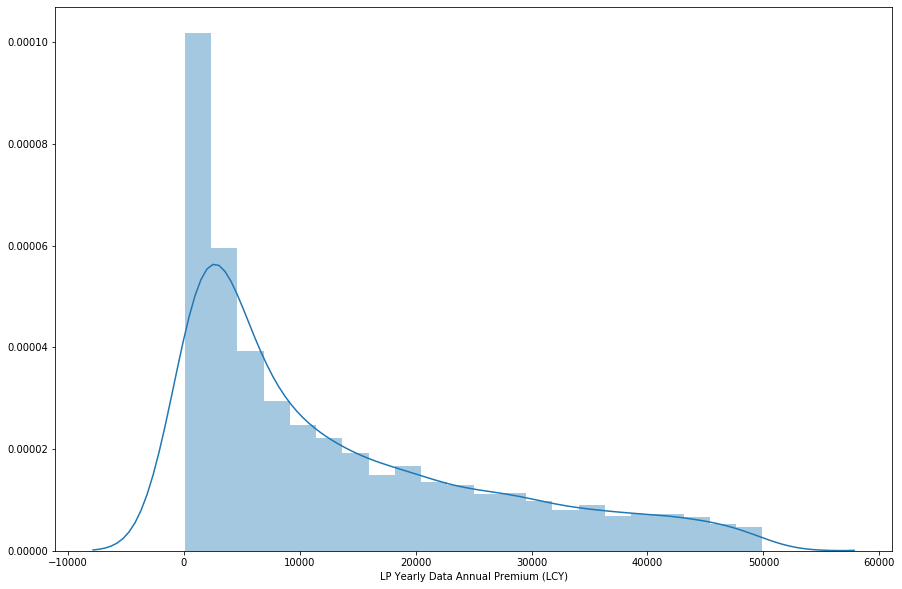

In [6]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['LP Yearly Data Annual Premium (LCY)'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
LP Status,-1900.831819
LP Yearly Data Insured Lives,136549.541348
LP Yearly Data Pooling Status,1320.055650
HQ Insured Lives,-1611.251029
HQ Pooled Lives,2492.200581
HQ Potential,0.002423
lp_substatus__In action,-1900.831806
lp_substatus__In process,-4108.087474
lp_substatus__Quote,2124.165718
lp_substatus__Won,3884.753561


In [8]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

           Actual     Predicted
3321  19680.24000  19164.264011
1367  41354.82000  11450.425743
224    8312.76000  13576.810597
641    4102.92000  13603.996141
1290   8262.00000   6103.234776
840   23623.92000  18015.429000
326    5013.60000  13478.505993
1895   8100.00000  13299.692582
775   30449.52000  13524.922001
2602   2742.12000   6729.279703
1530    119.00192  13200.813259
1739    951.48000  13567.500761
3641   4913.52540  12073.999708
1300  12413.52000  17495.904063
3820    324.00000  14548.883444
979   43058.52000  21767.198525
3038    751.68000   6916.139436
1385   7800.63000  13493.805759
1377  22809.78000  12731.172721
3391  47841.84000   9111.145948
248   13386.60000  13363.527606
572   27336.96000  20973.037741
3799    608.08360  20793.057510
661    7016.76000  16765.662512
1287    460.08000   4528.135474


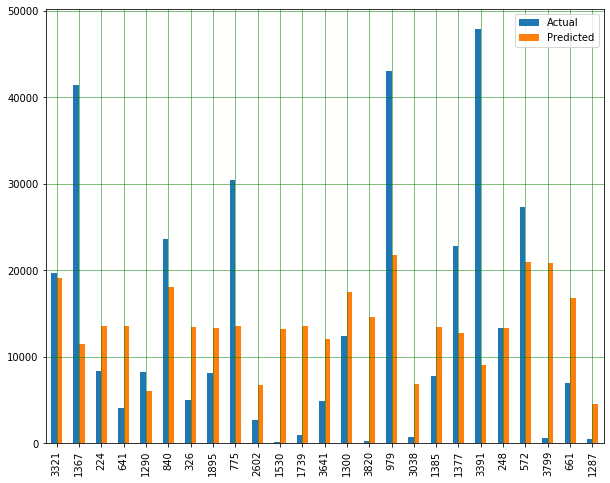

In [9]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9836.540196075783
Mean Squared Error: 150081253.11958155
Root Mean Squared Error: 12250.765409539992
